## TCC - Projeto Human Resources Analytics

### Machine Learning.

In [6]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [7]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [8]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [9]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [10]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [11]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [12]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [13]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,technical,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,technical,medium,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [14]:
df = df[:14998]

#### Alterando os tipos de dados.

In [15]:
# Supondo que df seja o seu DataFrame

# Convertendo com tratamento de erros, transformando não-numéricos em NaN
df["number_projects"] = pd.to_numeric(df["number_projects"], errors='coerce').fillna(0).astype(int)

# Repetindo o processo para as outras colunas, se necessário
df["mean_work_last_3_months"] = pd.to_numeric(df["mean_work_last_3_months"], errors='coerce').fillna(0).astype(int)
df["time_in_company"] = pd.to_numeric(df["time_in_company"], errors='coerce').fillna(0).astype(int)
df["work_accident"] = pd.to_numeric(df["work_accident"], errors='coerce').fillna(0).astype(int)
df["left"] = pd.to_numeric(df["left"], errors='coerce').fillna(0).astype(int)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int64  
 3   number_projects          14998 non-null  int64  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int64  
 7   work_accident            14998 non-null  int64  
 8   left                     14998 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [17]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


In [18]:
df = df[:14998]

#### Renomeando atributos

In [19]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [20]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


###  Importancia de Features

#### Converte os atributos categoricos valores numéricos.

In [21]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [22]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separando os conjuntos de dados.

In [23]:
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

#### Transformando os dados.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X = scaler.fit_transform(X)

In [27]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

#### Separando os conjuntos.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### Treinando o algoritmo de arvore de decisão.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [32]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

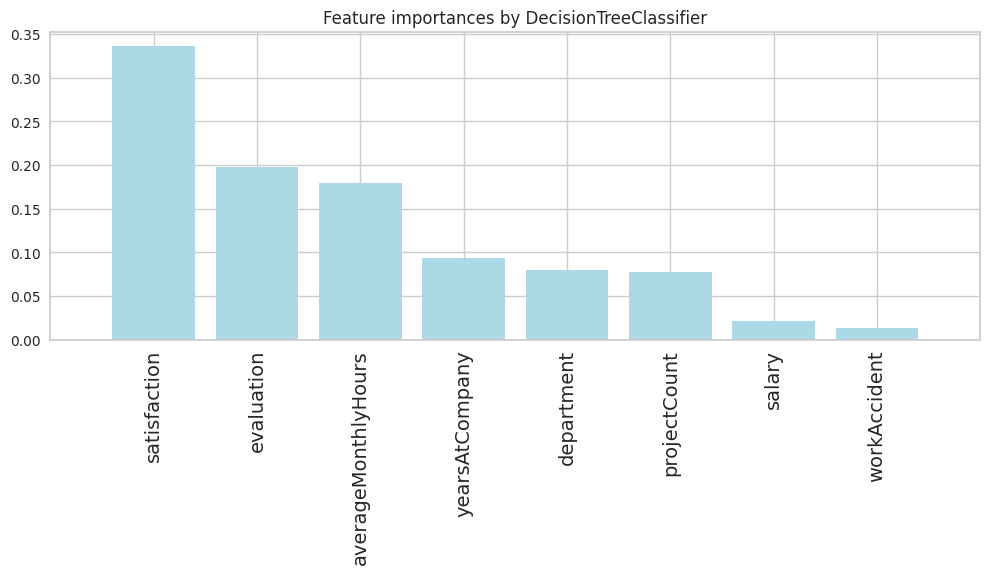

In [33]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtrando apenas os atributos relevantes.

In [34]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Separando os conjuntos de dados.

In [35]:
scaler = MinMaxScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [38]:
X_train

array([[0.59340659, 0.21875   , 0.40449438, 0.125     ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.3956044 , 0.28125   , 0.58426966, 0.125     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.92307692, 0.28125   , 0.46067416, 0.        ],
       [0.51648352, 0.5       , 0.53932584, 0.125     ]])

#### Função do modelo de base.

In [39]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importando métodos de métrica de avaliação.

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [41]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [42]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [43]:
y_predict = base_rate_model(X_test)

In [44]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [45]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



### Modelo de Regressão Logística.

#### Instânciando o algoritmo.

In [166]:
#from sklearn.linear_model import LogisticRegression
#logis = LogisticRegression()

#### Realizando o treinamento.

In [164]:
#logis.fit(X_train, y_train)

#### Calculando as predições.

In [161]:
#y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [159]:
#accuracy_result(y_test, y_predict)

In [160]:
#roc_classification_report_results("Logistic Regression", y_test, y_predict)

### Modelo de Arvore de decisão.

#### Instânciando o algoritmo.

In [171]:
#from sklearn.tree import DecisionTreeClassifier
#dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [178]:
#dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [173]:
#y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [177]:
#accuracy_result(y_test, y_predict)

In [176]:
#roc_classification_report_results("Decision Tree", y_test, y_predict)

### Modelo de Arvore Aleatória (Random Forest)

#### Instânciando o algoritmo.

In [185]:
#from sklearn.ensemble import RandomForestClassifier

In [186]:
#rf = RandomForestClassifier()

#### Realizando o treinamento.

In [187]:
#rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [188]:
#y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [189]:
#accuracy_result(y_test, y_predict)

In [190]:
#roc_classification_report_results("Random Forest", y_test, y_predict)

### Pycaret

In [1]:
pip install pycaret

In [5]:
#pip install pycaret

In [4]:
#import scipy
#print(scipy.__version__)

In [6]:
#%pip install scipy==1.11.4

#### Importando os métodos.

In [2]:
from pycaret.classification import*

#### Definindo o Setup.

In [46]:
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["yearsAtCompany"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

,Description,Value
0,Session id,3105
1,Target,turnover
2,Target type,Binary
3,Original data shape,"(14998, 5)"
4,Transformed data shape,"(20498, 5)"
5,Transformed train set shape,"(15998, 5)"
6,Transformed test set shape,"(4500, 5)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


#### Comparando diferentes modelos.

In [47]:
best = compare_models(fold = 5,sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6719,0.6773,0.6327,0.3850,0.4786,0.2594,0.2766,0.4500
lda,Linear Discriminant Analysis,0.6759,0.6772,0.6258,0.3880,0.4790,0.2622,0.2780,0.0220
nb,Naive Bayes,0.7037,0.6467,0.5886,0.4140,0.4860,0.2867,0.2955,0.2640
qda,Quadratic Discriminant Analysis,0.7142,0.5799,0.7459,0.4409,0.5541,0.3637,0.3911,0.0200
knn,K Neighbors Classifier,0.7569,0.5000,0.6755,0.4926,0.5696,0.4060,0.4159,0.3540
dt,Decision Tree Classifier,0.7455,0.5000,0.4922,0.4676,0.4792,0.3110,0.3114,0.0240
rf,Random Forest Classifier,0.8197,0.5000,0.5586,0.6393,0.5960,0.4806,0.4826,0.2720
ada,Ada Boost Classifier,0.8138,0.5000,0.6819,0.5951,0.6354,0.5112,0.5134,0.0760
gbc,Gradient Boosting Classifier,0.8351,0.5000,0.6815,0.6459,0.6631,0.5541,0.5545,0.1960
et,Extra Trees Classifier,0.8100,0.5000,0.5366,0.6158,0.5733,0.4518,0.4537,0.2040


#### Criando o modelo.

In [48]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8329,0.5000,0.6780,0.6408,0.6589,0.5483,0.5487
1,0.8433,0.5000,0.7060,0.6598,0.6821,0.5783,0.5789
2,0.8333,0.5000,0.6660,0.6453,0.6555,0.5456,0.5457
3,0.8352,0.5000,0.6914,0.6425,0.6660,0.5568,0.5575
4,0.8237,0.5000,0.6920,0.6157,0.6516,0.5342,0.5358
Mean,0.8337,0.5000,0.6867,0.6408,0.6628,0.5526,0.5533
Std,0.0062,0.0000,0.0136,0.0143,0.0107,0.0147,0.0145


#### Realizando o tunning do modelo.

In [49]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {
                                      "learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8162,0.5000,0.6660,0.6033,0.6331,0.5109,0.5120
1,0.8305,0.5000,0.6900,0.6319,0.6597,0.5471,0.5480
2,0.8167,0.5000,0.6540,0.6067,0.6295,0.5079,0.5085
3,0.8142,0.5000,0.6794,0.5958,0.6348,0.5109,0.5129
4,0.8166,0.5000,0.6760,0.6025,0.6371,0.5149,0.5165
Mean,0.8188,0.5000,0.6731,0.6080,0.6388,0.5183,0.5196
Std,0.0059,0.0000,0.0122,0.0124,0.0107,0.0145,0.0144


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### Finalizando o modelo.

In [50]:
final_model = finalize_model(gbc)

In [51]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['yearsAtCompany'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImput...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                 

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [52]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exportando o conjunto de dados para o disco.

In [53]:
df.to_csv("dataset.csv",index=False)

In [54]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)